In [ ]:
#IPython notebook plot formatting
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

import matplotlib.pyplot as plt

#Load the modules
import Extractors as e
import Classifiers as c
import DoyleMLToolkit as dmlt

#Make sure they get reloaded after changes
e = reload(e)
c = reload(c)
dmlt = reload(dmlt)

import warnings
warnings.filterwarnings('ignore')

In [20]:
#Define high order models to generate accurate variances

order = 12
zeroth = 0
positive = "Normal"
data = ["18OctoberSim/simClasses.csv","18OctoberSim/simHighData.csv"] #["kidney_final/KidneyClass.csv","kidney_final/KidneyData.csv"]
CancerModels = [
    dmlt.Model(e.ComplexFourier,c.NaiveBayesReal,order,0),
    #dmlt.Model(e.Chebyshev,c.NaiveBayesReal,order,0),
    dmlt.Model(e.PCA,c.NaiveBayesReal,order,0)
]


#Load relevant data

KidneyData = [model.load(data[0],data[1]) for model in CancerModels]

#Generate variances
varReal = []
varImag = []
for model in KidneyData:
    varReal.append(model.getVariances(0,0,zeroth))
    varImag.append(model.getVariances(1,0,zeroth))

#Replace each array with a set of tuples (index,value) of the n highest variances
n = 3
for model in range(len(varReal)):
    tmp1 = []
    tmp2 = []
    for i in range(n):
        tmp1.append((varReal[model].index(max(varReal[model])),max(varReal[model])))
        varReal[model][tmp1[-1][0]] = -1
        
        tmp2.append((varImag[model].index(max(varImag[model])),max(varImag[model])))
        varImag[model][tmp2[-1][0]] = -1
    varReal[model] = tmp1
    varImag[model] = tmp2

for i in range(len(varReal)):
    print varReal[i]
    print varImag[i]
    print ''


#Order things nicely
var = []
n = 2
for j in range(2):
    for i in range(n):
        var.append(varReal[i])
    for i in range(n):
        var.append(varImag[i])

[(0, 0.6547864119164795), (1, 0.06275933263497331), (2, 0.057635198946259555)]
[(0, 0.46335369758232925), (1, 0.1642113399928879), (2, 0.08322874268416573)]

[(0, 0.12016223667738238), (1, 0.11593709113661047), (2, 0.10048473865538907)]
[(0, 0.12023923453335962), (1, 0.1102105600581341), (2, 0.10693012633132935)]



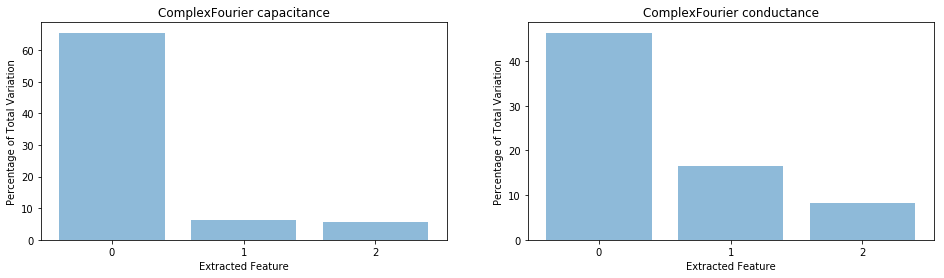

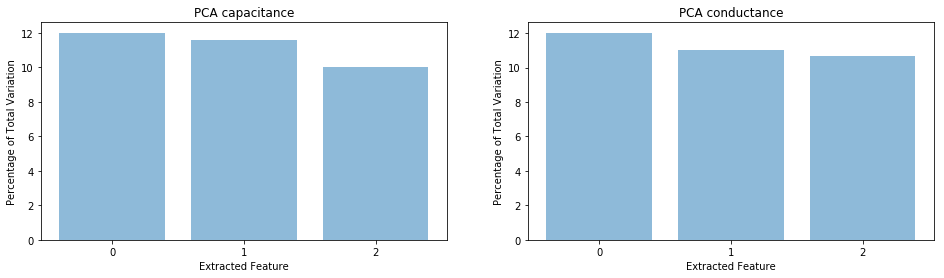

In [21]:
#Plot variances
pylab.rcParams['figure.figsize'] = (16, 4)


for model in range(len(KidneyData)):
    #Real
    objects = [str(i[0]) for i in varReal[model]]
    y_pos = np.arange(len(objects))
    performance = [100*i[1] for i in varReal[model]]

    plt.subplot(121)
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Percentage of Total Variation')
    plt.xlabel('Extracted Feature')
    plt.title(CancerModels[model].C.name+' capacitance')

    #Imaginary
    objects = [str(i[0]) for i in varImag[model]]
    y_pos = np.arange(len(objects))
    performance = [100*i[1] for i in varImag[model]]

    plt.subplot(122)
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Percentage of Total Variation')
    plt.xlabel('Extracted Feature')
    plt.title(CancerModels[model].C.name+' conductance')

    plt.show()

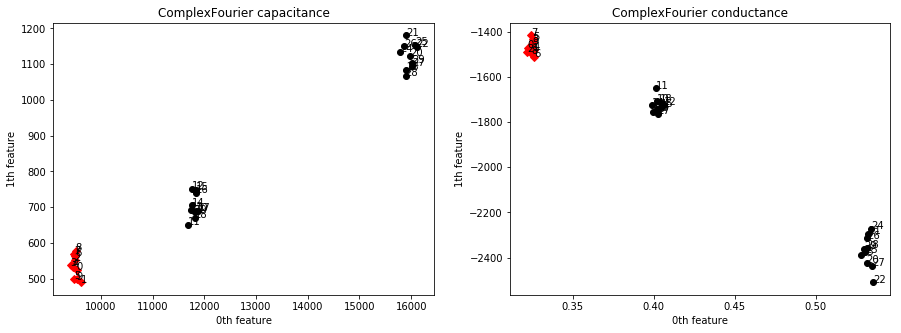

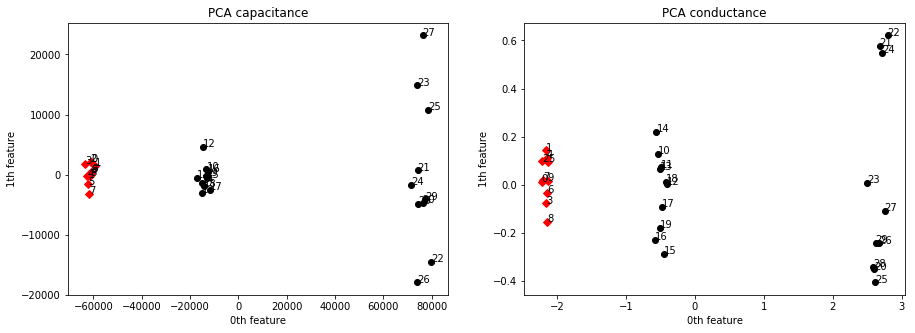

In [22]:
#Component plots
pylab.rcParams['figure.figsize'] = (15, 5)


for model in range(len(KidneyData)):
    #Real
    imaginary = 0
    classes = sorted(list(set(KidneyData[model].getAllY())))
    colors = ['red','orange','yellow','green','blue']

    x = 0
    y = 0
    plt.subplot(121)
    for row in range(len(KidneyData[model].getAllFeatures()[0])):
        x = KidneyData[model].getFeaturesBySweep(row,0,imaginary)[varReal[model][0][0]]
        y = KidneyData[model].getFeaturesBySweep(row,0,imaginary)[varReal[model][1][0]]
        if KidneyData[model].getAllY()[row] == positive:
            plt.plot([x],[y],color='#ff0000',marker='D',linewidth=0)
        else:
            plt.plot([x],[y],color='#000000',marker='o',linewidth=0)
        plt.annotate(str(row),(x+(1e-12),y+(3e-6)))

    plt.title(CancerModels[model].C.name+" capacitance")
    plt.xlabel("%dth feature"%varReal[model][0][0])
    plt.ylabel("%dth feature"%varReal[model][1][0])

    #Imaginary
    imaginary = 1
    classes = sorted(list(set(KidneyData[model].getAllY())))
    colors = ['red','orange','yellow','green','blue']

    x = 0
    y = 0
    plt.subplot(122)
    for row in range(len(KidneyData[model].getAllFeatures()[0])):
        x = KidneyData[model].getFeaturesBySweep(row,0,imaginary)[varImag[model][0][0]]
        y = KidneyData[model].getFeaturesBySweep(row,0,imaginary)[varImag[model][1][0]]
        if KidneyData[model].getAllY()[row] == positive:
            plt.plot([x],[y],color='#ff0000',marker='D',linewidth=0)
        else:
            plt.plot([x],[y],color='#000000',marker='o',linewidth=0)
        plt.annotate(str(row),(x-(1e-5),y+(0.9e-6)))

    plt.title(CancerModels[model].C.name+" conductance")
    plt.xlabel("%dth feature"%varImag[model][0][0])
    plt.ylabel("%dth feature"%varImag[model][1][0])
    plt.show()

In [17]:
CancerModels = [
    dmlt.Model(e.ComplexFourier,c.NaiveBayesReal,order,1),
    #dmlt.Model(e.Chebyshev,c.NaiveBayesReal,order,0),
    dmlt.Model(e.Bernstein,c.NaiveBayesReal,order,1)
]


#Load relevant data

KidneyData = [model.load(data[0],data[1]) for model in CancerModels]


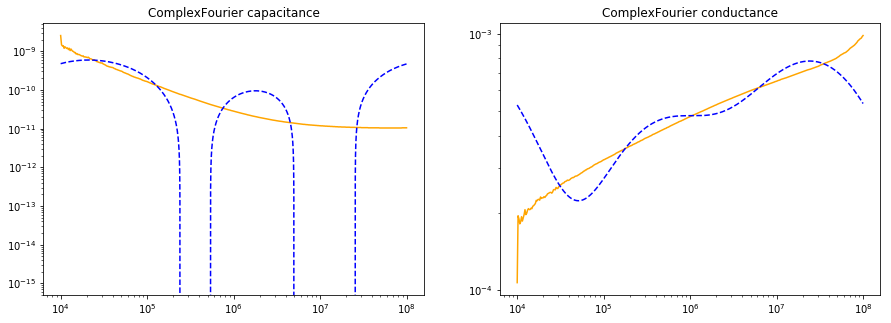

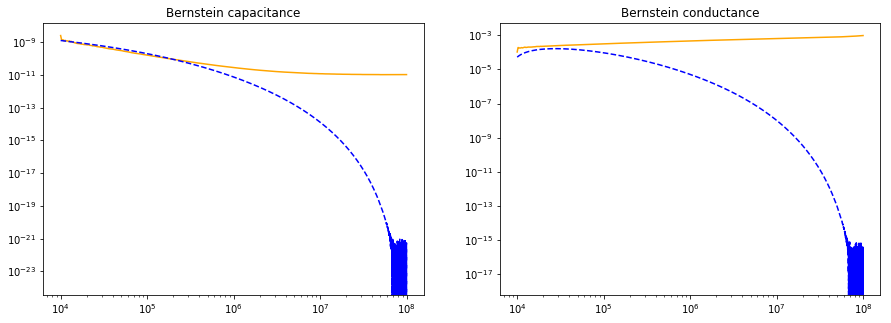

In [9]:
#Reconstructed plots

for model in range(len(KidneyData)):
    #Real
    feats = [var[model][0][0],var[model][1][0],var[model][2][0]]
    imaginary = 0
    plt.subplot(121)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(CancerModels[model].C.name+" capacitance")
    CancerModels[model].plotSample(KidneyData[model],0,'orange',imaginary)
    CancerModels[model].plotApproximation(KidneyData[model],0,'b--',imaginary,0,feats)

    #Imaginary
    feats = [var[model+2][0][0],var[model+2][1][0],var[model+2][2][0]]
    imaginary = 1
    plt.subplot(122)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(CancerModels[model].C.name+" conductance")
    CancerModels[model].plotSample(KidneyData[model],0,'orange',imaginary)
    CancerModels[model].plotApproximation(KidneyData[model],0,'b--',imaginary,0,feats)

    plt.show()

In [23]:
#Redefine models at without zeroth to make actual classifications

CancerModels = [
    dmlt.Model(e.ComplexFourier,c.NaiveBayesReal,order,zeroth),
    #dmlt.Model(e.Chebyshev,c.NaiveBayesReal,order,zeroth),
    dmlt.Model(e.PCA,c.NaiveBayesReal,order,zeroth),
    
    dmlt.Model(e.ComplexFourier,c.NaiveBayesImag,order,zeroth),
    #dmlt.Model(e.Chebyshev,c.NaiveBayesImag,order,zeroth),
    dmlt.Model(e.PCA,c.NaiveBayesImag,order,zeroth),


    dmlt.Model(e.ComplexFourier,c.NBKernelReal,order,zeroth),
    #dmlt.Model(e.Chebyshev,c.NBKernelReal,order,zeroth),
    dmlt.Model(e.PCA,c.NBKernelReal,order,zeroth),

    dmlt.Model(e.ComplexFourier,c.NBKernelImag,order,zeroth),
    #dmlt.Model(e.Chebyshev,c.NBKernelImag,order,zeroth),
    dmlt.Model(e.PCA,c.NBKernelImag,order,zeroth)
]


#Load relevant data

KidneyData = [model.load(data[0],data[1]) for model in CancerModels]

ComplexFourier
Naive Bayes Real
20.0 0.0
0.0 10.0
[1.0, 1.0, 1.0, 1.0]

PCA
Naive Bayes Real
20.0 0.0
0.0 10.0
[1.0, 1.0, 1.0, 1.0]

ComplexFourier
Naive Bayes Imaginary
20.0 0.0
0.0 10.0
[1.0, 1.0, 1.0, 1.0]

PCA
Naive Bayes Imaginary
20.0 0.0
0.0 10.0
[1.0, 1.0, 1.0, 1.0]

ComplexFourier
Kernel Density Estimation Real


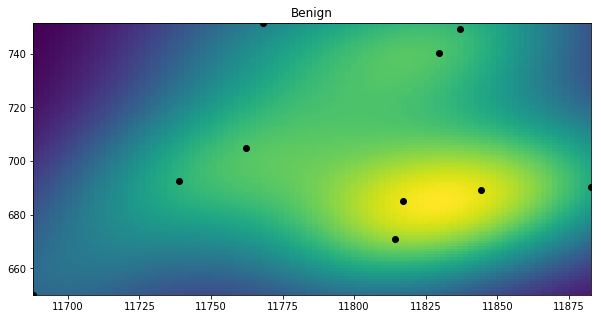

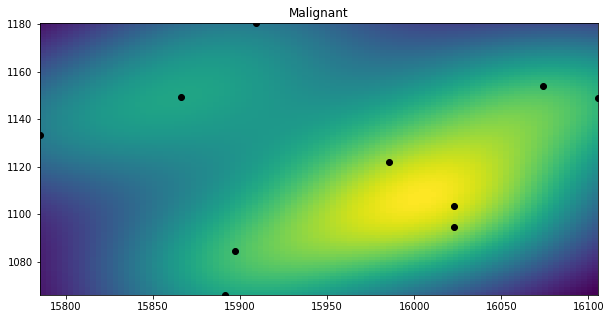

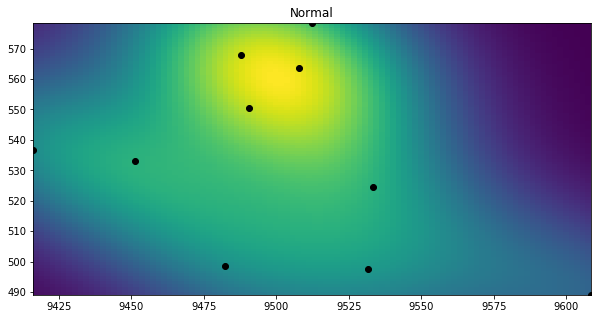

20.0 0.0
0.0 10.0
[1.0, 1.0, 1.0, 1.0]

PCA
Kernel Density Estimation Real


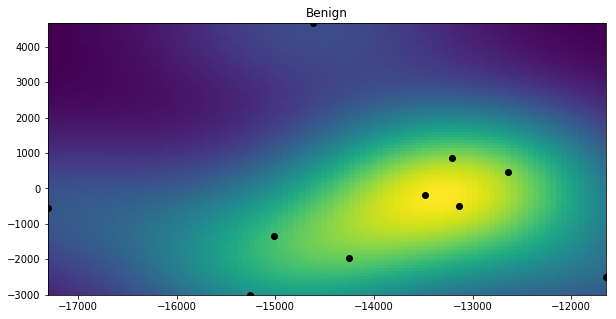

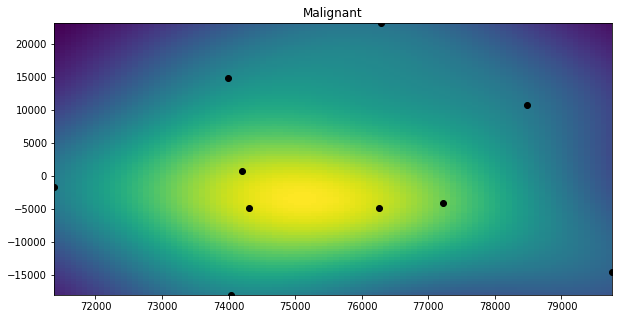

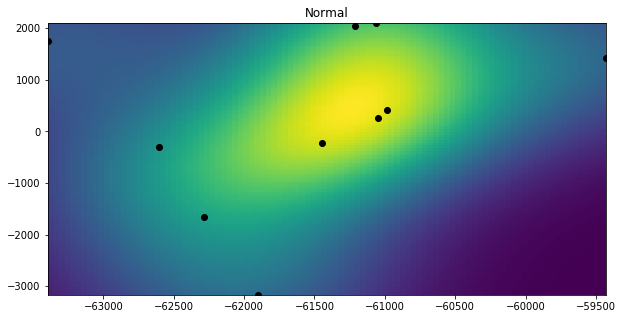

20.0 0.0
0.0 10.0
[1.0, 1.0, 1.0, 1.0]

ComplexFourier
Kernel Density Estimation Imaginary


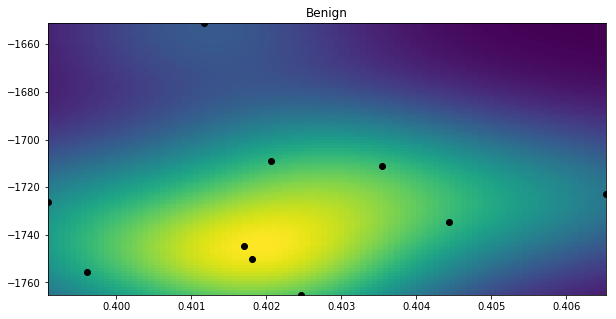

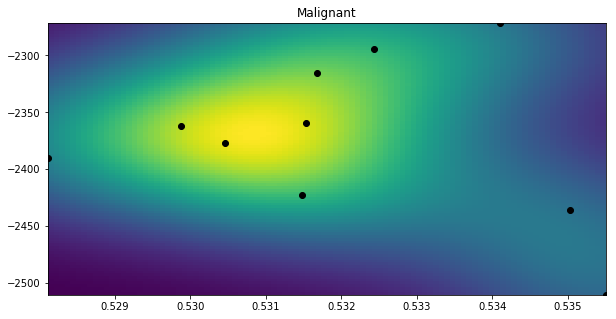

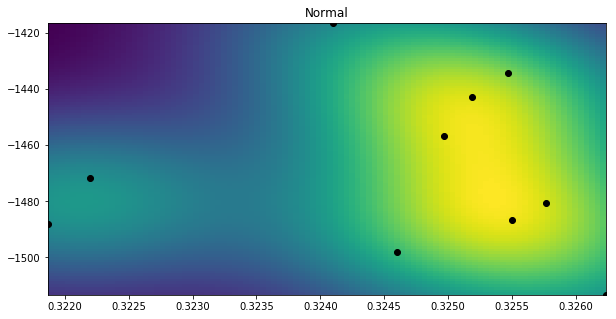

20.0 0.0
0.0 10.0
[1.0, 1.0, 1.0, 1.0]

PCA
Kernel Density Estimation Imaginary


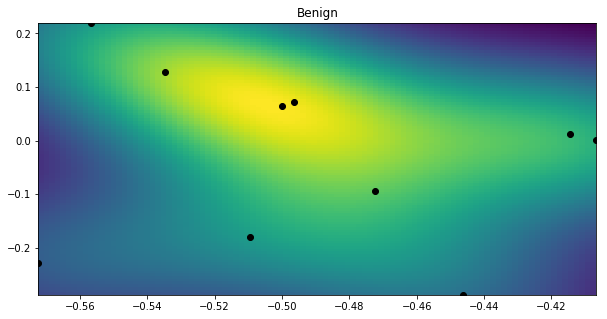

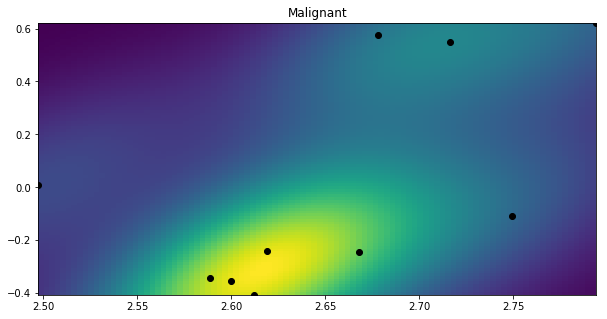

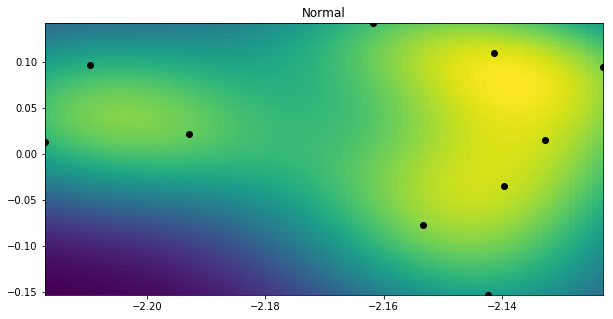

20.0 0.0
0.0 10.0
[1.0, 1.0, 1.0, 1.0]



In [24]:
pylab.rcParams['figure.figsize'] = (10, 5)

#Test model

for model in range(len(CancerModels)):
    CancerModels[model].train(KidneyData[model],[])
    print CancerModels[model].C.name
    print CancerModels[model].L.name
    feats = [var[model][0][0],var[model][1][0]]
    #print feats
    CancerModels[model].train(KidneyData[model],[],feats,1)
    #CancerModels[model].predict(KidneyData[model],KidneyData[model].getAllY())
    print CancerModels[model].test(KidneyData[model],positive,feats)
    print ''